In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Principal component analysis using scikit-learn

When analysing mixtures of compounds, it is important to ensure that ill-conditioning of the data does not occur. Ill-conditioning arises as a result of a parallel-linear relationship between parameters (measurements). To avoid ill-conditioning, the relationship between parameters should be orthogonal, so a change in one does not change (or significantly change) the other.

Principal component analysis (PCA) transforms the original variables into new, uncorrelated variables called principal components - the technique is analagous to finding a set of orthogonal axes that represent the directions of greatest variance (Haswell, 1992). This is achieved using a linear combination of the original measurement variables. Using this method, ill-conditioning of the data is avoided.

A principal component analysis has been carried out on a full spectral dataset of 5 known and 1 unknown mixture(s):

In [2]:
# Read data

spectral_data_df = pd.read_csv("Data/PCA_data.csv", index_col='nm')
print(spectral_data_df)

      mix1   mix2   mix3   mix4   mix5  unknown
nm                                             
300  0.301  0.195  0.299  0.682  0.345    0.361
305  0.369  0.230  0.231  0.730  0.343    0.370
310  0.419  0.255  0.181  0.666  0.329    0.362
315  0.446  0.273  0.156  0.518  0.308    0.342
320  0.453  0.285  0.161  0.348  0.292    0.322
325  0.444  0.297  0.201  0.211  0.290    0.314
330  0.419  0.307  0.274  0.129  0.306    0.320
335  0.379  0.313  0.369  0.094  0.334    0.336
340  0.327  0.314  0.465  0.088  0.362    0.352
345  0.268  0.307  0.537  0.091  0.376    0.355
350  0.209  0.294  0.561  0.091  0.367    0.338
355  0.155  0.279  0.529  0.085  0.331    0.298
360  0.111  0.272  0.451  0.072  0.277    0.242
365  0.081  0.290  0.351  0.056  0.217    0.182
370  0.068  0.353  0.257  0.042  0.168    0.130
375  0.077  0.469  0.187  0.032  0.141    0.097
380  0.112  0.617  0.147  0.027  0.139    0.087
385  0.173  0.743  0.128  0.026  0.156    0.101
390  0.258  0.786  0.117  0.026  0.182  

In [3]:
# Transpose data

spectral_data_df_wide = spectral_data_df.transpose()
print(spectral_data_df_wide)

nm         300    305    310    315    320    325    330    335    340    345  \
mix1     0.301  0.369  0.419  0.446  0.453  0.444  0.419  0.379  0.327  0.268   
mix2     0.195  0.230  0.255  0.273  0.285  0.297  0.307  0.313  0.314  0.307   
mix3     0.299  0.231  0.181  0.156  0.161  0.201  0.274  0.369  0.465  0.537   
mix4     0.682  0.730  0.666  0.518  0.348  0.211  0.129  0.094  0.088  0.091   
mix5     0.345  0.343  0.329  0.308  0.292  0.290  0.306  0.334  0.362  0.376   
unknown  0.361  0.370  0.362  0.342  0.322  0.314  0.320  0.336  0.352  0.355   

nm       ...    355    360    365    370    375    380    385    390    395  \
mix1     ...  0.155  0.111  0.081  0.068  0.077  0.112  0.173  0.258  0.357   
mix2     ...  0.279  0.272  0.290  0.353  0.469  0.617  0.743  0.786  0.718   
mix3     ...  0.529  0.451  0.351  0.257  0.187  0.147  0.128  0.117  0.104   
mix4     ...  0.085  0.072  0.056  0.042  0.032  0.027  0.026  0.026  0.025   
mix5     ...  0.331  0.277  0.217  0.

In [4]:
# Normalise spectral data i.e. mean center and scale by the root means sum of squares (MC-RMSS)

x = spectral_data_df_wide.values
x = StandardScaler().fit_transform(x)

In [5]:
# Project spectral data to principal components

pca_spectral_data = PCA(n_components=3)
principalComponents_spectral_data = pca_spectral_data.fit_transform(x)

In [6]:
# Create dataframe of principal components

principal_spectral_df = pd.DataFrame(data = principalComponents_spectral_data, 
                                     columns = ['principal component 1', 
                                                'principal component 2', 
                                                'principal component 3'])

print(principal_spectral_df)

   principal component 1  principal component 2  principal component 3
0               1.416624              -2.438830               2.916772
1              -3.759678              -3.564892              -2.263583
2              -3.724038               3.727331              -0.224473
3               6.459037               0.669522              -2.075864
4              -0.624679               0.892993               0.528946
5               0.232734               0.713876               1.118201


In [7]:
# Explained variance ratio for each principal component

print('Explained variation per principal component: {}'.format \
      (pca_spectral_data.explained_variance_ratio_))

Explained variation per principal component: [0.57280954 0.27225922 0.15492958]


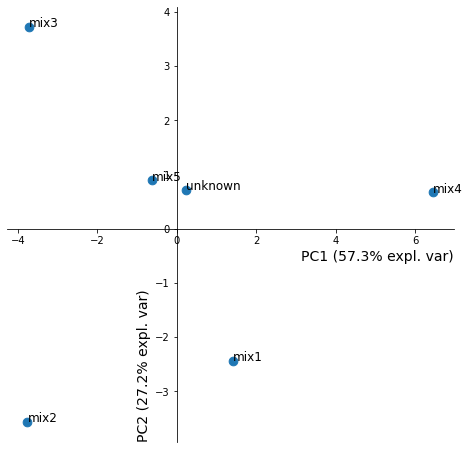

<Figure size 720x720 with 0 Axes>

In [8]:
# Scatter plot of principal components 1 and 2 (accounting for ~85% of variance)

fig, ax = plt.subplots(figsize=(8,8))
plt.figure(figsize=(10,10))
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

n = ['mix1', 'mix2', 'mix3', 'mix4', 'mix5', 'unknown']
x = principal_spectral_df['principal component 1']
y = principal_spectral_df['principal component 2']

ax.scatter(x, y, s=75)

for i, label in enumerate(n):
    ax.annotate(label, (x[i], y[i]), size=12)

ax.set_xlabel('PC1 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[0]*100),
              size=14, loc='right')
ax.set_ylabel('PC2 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[1]*100),
              size=14, loc='bottom')

plt.show()    # the unknown plot in a similar position to known mix5

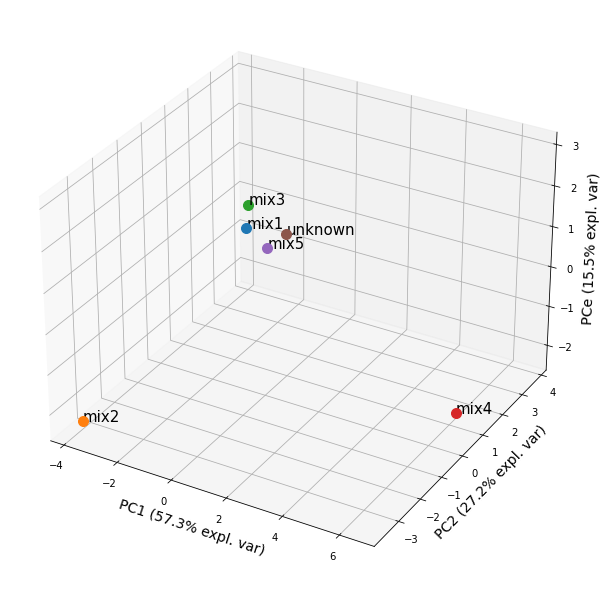

In [9]:
# 3D plot of principal components 1, 2 and 3 (accounting for 100% of variance)
# See below for zoomed-in version

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

labels = ['mix1', 'mix2', 'mix3', 'mix4', 'mix5', 'unknown']

for i in range(len(principal_spectral_df)):
    x, y, z = principal_spectral_df.iloc[i]['principal component 1'], \
    principal_spectral_df.iloc[i]['principal component 2'], \
    principal_spectral_df.iloc[i]['principal component 3']
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z, '{0}'.format(labels[i]), fontsize=15)

ax.set_xlabel('PC1 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[0]*100),
              size=14)
ax.set_ylabel('PC2 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[1]*100),
              size=14)
ax.set_zlabel('PCe ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[2]*100),
              size=14)
    
plt.show()    

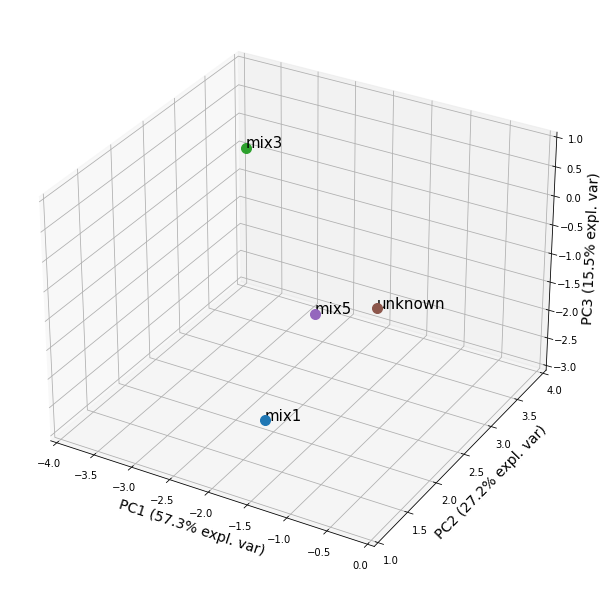

In [10]:
# 3D plot of principal components 1, 2 and 3 (ZOOM)

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
ax.set_xlim3d(-4,0)
ax.set_ylim3d(1,4)
ax.set_zlim3d(-3,1)
fig.add_axes(ax)

labels = ['mix1', 'mix2', 'mix3', 'mix4', 'mix5', 'unknown']

for i in range(len(principal_spectral_df)):
    x, y, z = principal_spectral_df.iloc[i]['principal component 1'], \
    principal_spectral_df.iloc[i]['principal component 2'], \
    principal_spectral_df.iloc[i]['principal component 3']
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z, '{0}'.format(labels[i]), fontsize=15)

ax.set_xlabel('PC1 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[0]*100),
              size=14)
ax.set_ylabel('PC2 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[1]*100),
              size=14)
ax.set_zlabel('PC3 ({:.1f}% expl. var)'.format(pca_spectral_data.explained_variance_ratio_[2]*100),
              size=14)
    
plt.show()    # the unknown plot in a similar position to known mix5

## References

Haswell, S.J. (1992). Practical Guide to Chemometrics. Marcel Dekker Inc., New York.